Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


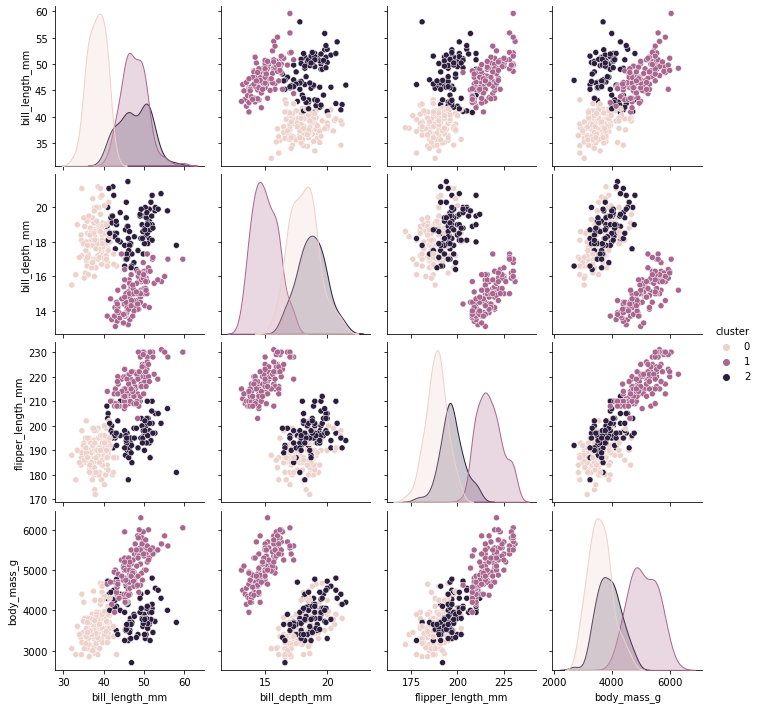

cluster  species  
0        Adelie       124
         Chinstrap      5
1        Gentoo       119
2        Chinstrap     63
         Adelie        22
Name: species, dtype: int64


In [6]:
# 필요한 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 펭귄 데이터셋 로드
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# 결측값 처리
df.dropna(inplace=True)

# 열 이름 확인 후 수정
print(df.columns)

# 정확한 열 이름으로 변경
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# 특성 선택
X = df[features]

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 군집화 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 산점도 행렬 시각화
sns.pairplot(df, hue='cluster', vars=features)
plt.show()

# 클러스터 결과 확인
print(df.groupby('cluster')['species'].value_counts())


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 펭귄 데이터셋 로드
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# 결측값 처리
df.dropna(inplace=True)

# 데이터 확인
print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


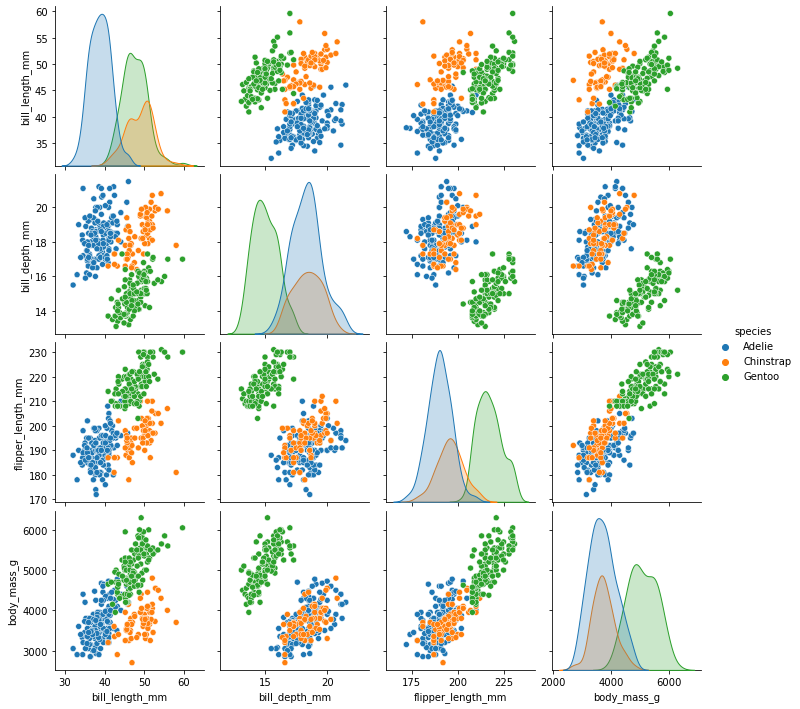

In [3]:
# 산점도 행렬
sns.pairplot(df, hue='species')
plt.show()


Confusion Matrix:
 [[124  22   0]
 [  5  63   0]
 [  0   0 119]]
Accuracy: 0.92
Adjusted Rand Index (ARI): 0.80
Normalized Mutual Information (NMI): 0.79


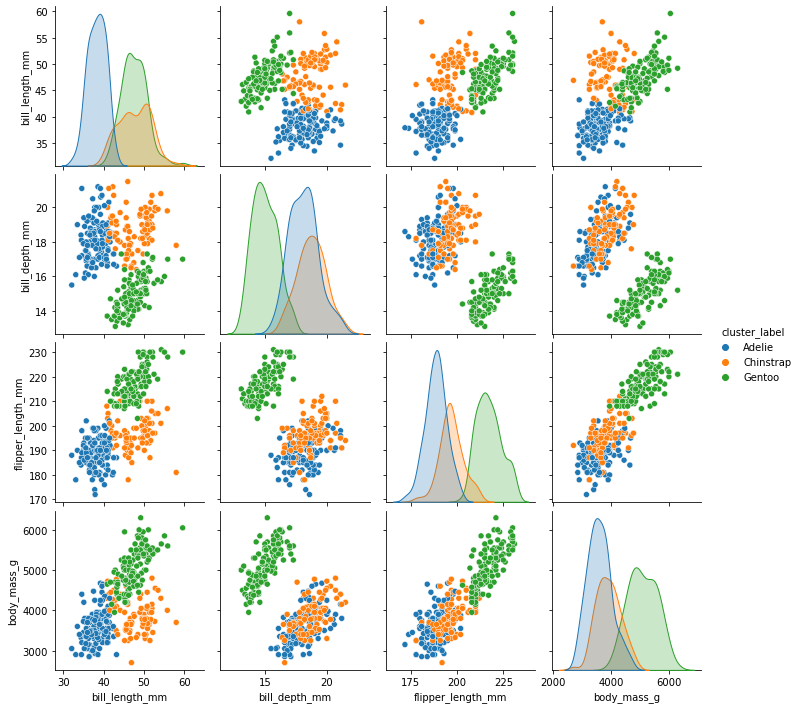

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score, normalized_mutual_info_score

# 펭귄 데이터셋 로드
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# 결측값 처리
df.dropna(inplace=True)

# 정확한 열 이름으로 변경
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# 특성 선택
X = df[features]
y_true = df['species']

# 특성 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 군집화 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 혼동 행렬 계산
labels_map = {i: y_true[kmeans.labels_ == i].mode()[0] for i in range(3)}
df['cluster_label'] = df['cluster'].map(labels_map)

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, df['cluster_label'], labels=y_true.unique())
print("Confusion Matrix:\n", conf_matrix)

# 정확도 계산
accuracy = accuracy_score(y_true, df['cluster_label'])
print(f"Accuracy: {accuracy:.2f}")

# 조정된 랜드 지수
ari = adjusted_rand_score(y_true, df['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# 상호 정보 점수
nmi = normalized_mutual_info_score(y_true, df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# 시각화
sns.pairplot(df, hue='cluster_label', vars=features)
plt.show()


Confusion Matrix (Iris):
 [[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]
Accuracy (Iris): 0.83
Adjusted Rand Index (ARI, Iris): 0.62
Normalized Mutual Information (NMI, Iris): 0.66


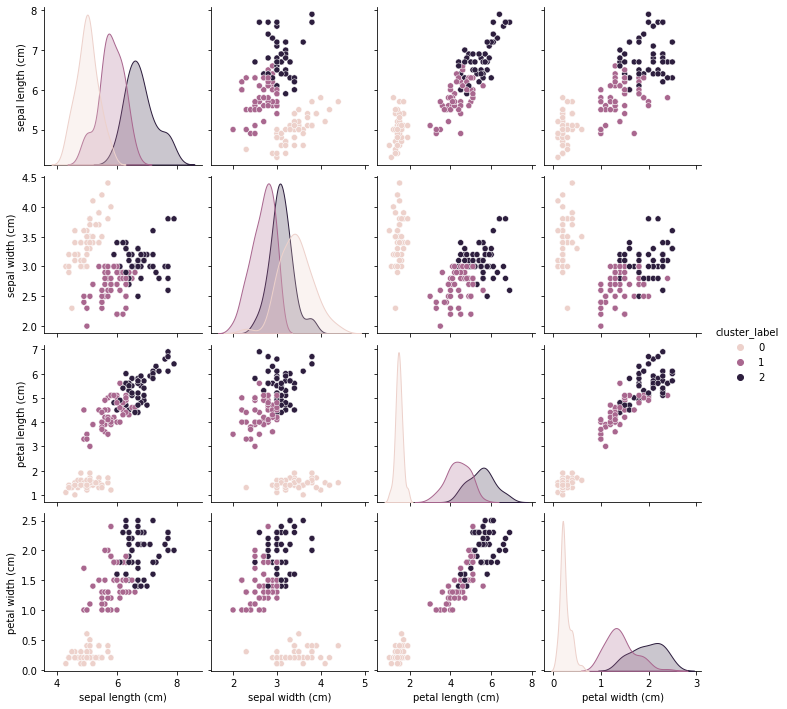

In [9]:
# 붓꽃 데이터셋 로드
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

# 특성 선택
features_iris = iris.feature_names
X_iris = df_iris[features_iris]
y_true_iris = df_iris['species']

# 특성 표준화
X_scaled_iris = StandardScaler().fit_transform(X_iris)

# K-평균 군집화 수행
kmeans_iris = KMeans(n_clusters=3, random_state=42)
df_iris['cluster'] = kmeans_iris.fit_predict(X_scaled_iris)

# 혼동 행렬 계산
labels_map_iris = {i: y_true_iris[kmeans_iris.labels_ == i].mode()[0] for i in range(3)}
df_iris['cluster_label'] = df_iris['cluster'].map(labels_map_iris)

# 혼동 행렬 출력
conf_matrix_iris = confusion_matrix(y_true_iris, df_iris['cluster_label'], labels=y_true_iris.unique())
print("Confusion Matrix (Iris):\n", conf_matrix_iris)

# 정확도 계산
accuracy_iris = accuracy_score(y_true_iris, df_iris['cluster_label'])
print(f"Accuracy (Iris): {accuracy_iris:.2f}")

# 조정된 랜드 지수
ari_iris = adjusted_rand_score(y_true_iris, df_iris['cluster'])
print(f"Adjusted Rand Index (ARI, Iris): {ari_iris:.2f}")

# 상호 정보 점수
nmi_iris = normalized_mutual_info_score(y_true_iris, df_iris['cluster'])
print(f"Normalized Mutual Information (NMI, Iris): {nmi_iris:.2f}")

# 시각화
sns.pairplot(df_iris, hue='cluster_label', vars=features_iris)
plt.show()


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 펭귄 데이터셋 로드
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# 결측값 처리
df.dropna(inplace=True)

# 열 이름 확인
print(df.columns)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler

# 사용 특성 선택
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

# K-평균 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# K-평균 클러스터 결과 시각화
sns.pairplot(df, hue='kmeans_cluster', vars=features)
plt.title("K-Means Clustering")
plt.show()


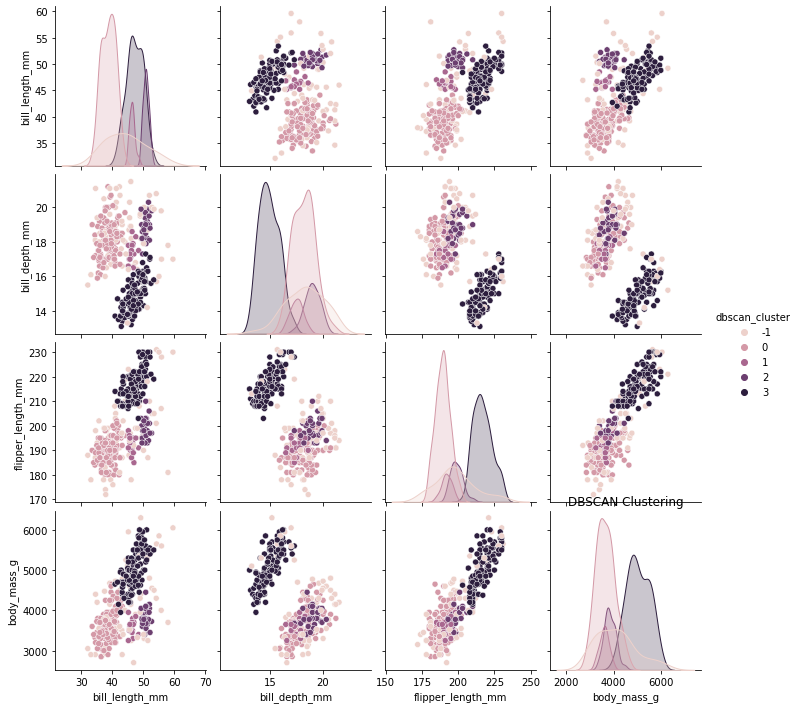

In [12]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# DBSCAN 클러스터 결과 시각화
sns.pairplot(df, hue='dbscan_cluster', vars=features)
plt.title("DBSCAN Clustering")
plt.show()


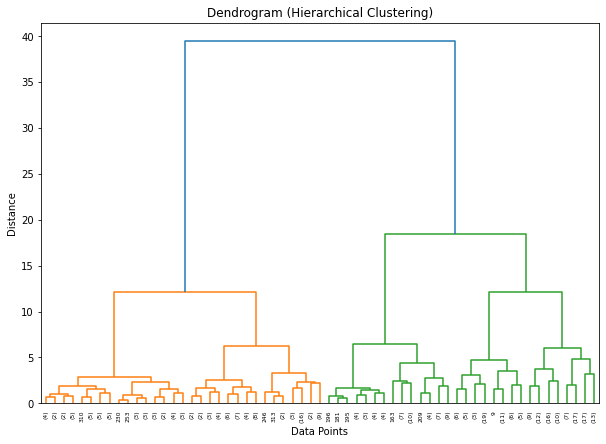

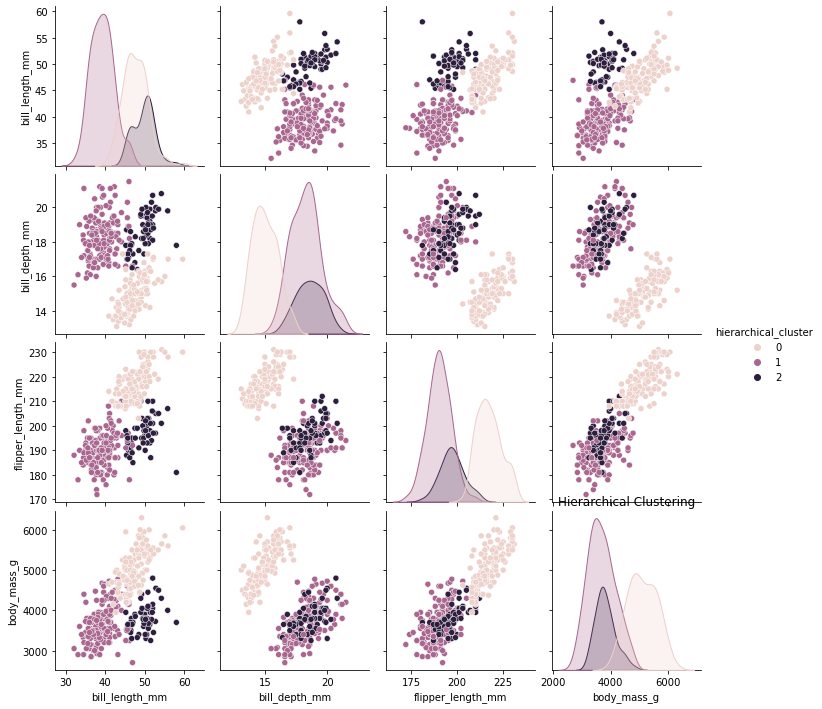

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 계층적 클러스터링
Z = linkage(X_scaled, method='ward')

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# 계층적 클러스터링 적용
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['hierarchical_cluster'] = hc.fit_predict(X_scaled)

# 계층적 클러스터 결과 시각화
sns.pairplot(df, hue='hierarchical_cluster', vars=features)
plt.title("Hierarchical Clustering")
plt.show()


In [27]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score

# 실제 라벨
y_true = df['species']

# 평가 함수 정의
def evaluate_clustering(true_labels, cluster_labels, method_name):
    print(f"\n{method_name} Clustering Evaluation:")
    
    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(true_labels, cluster_labels)
    print("Confusion Matrix:\n", conf_matrix)
    
    # 조정된 랜드 지수
    ari = adjusted_rand_score(true_labels, cluster_labels)
    print(f"Adjusted Rand Index (ARI): {ari:.2f}")
    
    # 상호 정보 점수
    nmi = normalized_mutual_info_score(true_labels, cluster_labels)
    print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# K-평균 클러스터링 평가
evaluate_clustering(y_true, df['kmeans_cluster'], 'K-Means')

# DBSCAN 클러스터링 평가
evaluate_clustering(y_true, df['dbscan_cluster'], 'DBSCAN')

# 계층적 클러스터링 평가
evaluate_clustering(y_true, df['hierarchical_cluster'], 'Hierarchical')


KeyError: 'kmeans_cluster'

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  
   kmeans_cluster kmeans_cluster_str
0               0                  0
1               0                  0
2               0                  0
4               0                  0
5               0                  0
   dbscan_cluster dbscan_cluster_str
0               0                  0
1               0                  0
2               0                  0
4               0                  

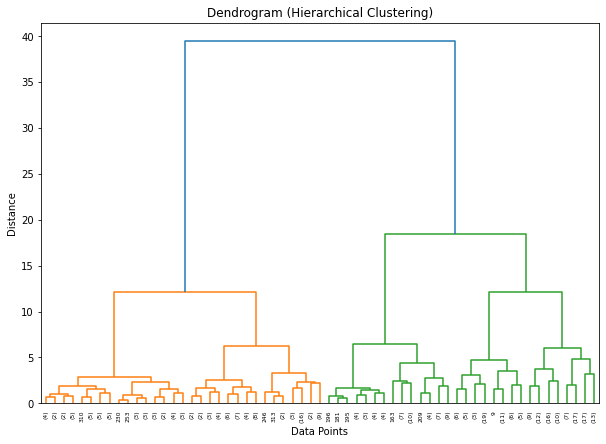

   hierarchical_cluster hierarchical_cluster_str
0                     1                        1
1                     1                        1
2                     1                        1
4                     1                        1
5                     1                        1


In [28]:
import pandas as pd

# 펭귄 데이터셋 로드
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# 결측값 처리
df.dropna(inplace=True)

# 사용 특성 선택
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

# 데이터 확인
print(df.head())
from sklearn.preprocessing import StandardScaler

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# K-평균 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터 라벨을 문자열로 변환
df['kmeans_cluster_str'] = df['kmeans_cluster'].astype(str)

# 데이터프레임 확인
print(df[['kmeans_cluster', 'kmeans_cluster_str']].head())
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# 클러스터 라벨을 문자열로 변환
df['dbscan_cluster_str'] = df['dbscan_cluster'].astype(str)

# 데이터프레임 확인
print(df[['dbscan_cluster', 'dbscan_cluster_str']].head())
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 계층적 클러스터링
Z = linkage(X_scaled, method='ward')

# 덴드로그램 생성
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# 계층적 클러스터링 적용
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['hierarchical_cluster'] = hc.fit_predict(X_scaled)

# 클러스터 라벨을 문자열로 변환
df['hierarchical_cluster_str'] = df['hierarchical_cluster'].astype(str)

# 데이터프레임 확인
print(df[['hierarchical_cluster', 'hierarchical_cluster_str']].head())


In [18]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score

# 실제 라벨
y_true = df['species']

# 평가 함수 정의
def evaluate_clustering(true_labels, cluster_labels, method_name):
    print(f"\n{method_name} Clustering Evaluation:")
    
    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(true_labels, cluster_labels)
    print("Confusion Matrix:\n", conf_matrix)
    
    # 조정된 랜드 지수
    ari = adjusted_rand_score(true_labels, cluster_labels)
    print(f"Adjusted Rand Index (ARI): {ari:.2f}")
    
    # 상호 정보 점수
    nmi = normalized_mutual_info_score(true_labels, cluster_labels)
    print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# K-평균 클러스터링 평가
evaluate_clustering(y_true, df['kmeans_cluster_str'], 'K-Means')

# DBSCAN 클러스터링 평가
evaluate_clustering(y_true, df['dbscan_cluster_str'], 'DBSCAN')

# 계층적 클러스터링 평가
evaluate_clustering(y_true, df['hierarchical_cluster_str'], 'Hierarchical')



K-Means Clustering Evaluation:
Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [124   0  22   0   0   0]
 [  5   0  63   0   0   0]
 [  0 119   0   0   0   0]]
Adjusted Rand Index (ARI): 0.80
Normalized Mutual Information (NMI): 0.79

DBSCAN Clustering Evaluation:
Confusion Matrix:
 [[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [ 34 112   0   0   0   0   0   0]
 [ 22   3  16  27   0   0   0   0]
 [ 10   0   0   0 109   0   0   0]]
Adjusted Rand Index (ARI): 0.66
Normalized Mutual Information (NMI): 0.66

Hierarchical Clustering Evaluation:
Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0 146   0   0   0   0]
 [  0  11  57   0   0   0]
 [119   0   0   0   0   0]]
Adjusted Rand Index (ARI): 0.91
Normalized Mutual Information (NMI): 0.90


In [22]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 로지스틱 회귀 모델 학습
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# 예측 및 평가
y_pred = logreg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        44
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       0.97      1.00      0.99        36

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Accuracy: 0.99


C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        44
   Chinstrap       0.91      1.00      0.95        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Accuracy: 0.98


In [25]:
from sklearn.svm import SVC

# SVM 모델 학습
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = svm.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        44
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy: 1.0


In [26]:
# 클러스터링 없는 특징으로 모델 학습
X_train_no_cluster, X_test_no_cluster, _, _ = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 로지스틱 회귀 모델
logreg_no_cluster = LogisticRegression(max_iter=200)
logreg_no_cluster.fit(X_train_no_cluster, y_train)
y_pred_no_cluster = logreg_no_cluster.predict(X_test_no_cluster)
print("Logistic Regression without Clustering Report:\n", classification_report(y_test, y_pred_no_cluster))
print("Accuracy:", accuracy_score(y_test, y_pred_no_cluster))

# 랜덤 포레스트 모델
rf_no_cluster = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_cluster.fit(X_train_no_cluster, y_train)
y_pred_rf_no_cluster = rf_no_cluster.predict(X_test_no_cluster)
print("Random Forest without Clustering Report:\n", classification_report(y_test, y_pred_rf_no_cluster))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_no_cluster))

# SVM 모델
svm_no_cluster = SVC(kernel='linear', random_state=42)
svm_no_cluster.fit(X_train_no_cluster, y_train)
y_pred_svm_no_cluster = svm_no_cluster.predict(X_test_no_cluster)
print("SVM without Clustering Report:\n", classification_report(y_test, y_pred_svm_no_cluster))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_no_cluster))


Logistic Regression without Clustering Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        44
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       0.97      1.00      0.99        36

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Accuracy: 0.98
Random Forest without Clustering Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        44
   Chinstrap       0.87      1.00      0.93        20
      Gentoo       1.00      0.97      0.99        36

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.96       100
weighted avg       0.97      0.97      0.97       100

Accuracy: 0.97
SVM without Clustering Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.

C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
